This is an assignment to create an ML model for a Titanic train data set. The tasks shall be:
- Load and understand the data
- Query the dataset - get some insight from it
- Clean the dataset with the target of woring with ML
- Build and train the ML model - Logistic regression
- Perfrom hyperparameter tuning techniques - Random search
- Report that will summarize the performance of the ML model

A number of tools will be used to achieve this:
    *numpy
    *pandas
    *matplotlip
    *wandb - record the results

# Filter uneccesary warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

# import pandas and numpy 

In [2]:
import numpy as np
import pandas as pd

# Results that are reproducible -> seeding

In [3]:
np.random.seed(8)

# Reading the data

In [4]:
data = pd.read_csv("titanic_train.csv")

In [5]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PassengerId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Survived,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)","Sandstrom, Miss. Marguerite Rut","Bonnell, Miss. Elizabeth","Saundercock, Mr. William Henry","Andersson, Mr. Anders Johan","Vestrom, Miss. Hulda Amanda Adolfina","Hewlett, Mrs. (Mary D Kingcome)","Rice, Master. Eugene","Williams, Mr. Charles Eugene","Vander Planke, Mrs. Julius (Emelia Maria Vande...","Masselmani, Mrs. Fatima"
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,4.0,58.0,20.0,39.0,14.0,55.0,2.0,NaN,31.0,NaN
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16.0,29.125,13.0,18.0,7.225


In [6]:
data.tail(20).T

,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890
PassengerId,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891
Survived,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
Pclass,1,1,3,2,3,3,3,3,1,2,3,3,2,3,3,2,1,3,1,3
Name,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)","Carlsson, Mr. Frans Olof","Vander Cruyssen, Mr. Victor","Abelson, Mrs. Samuel (Hannah Wizosky)","Najib, Miss. Adele Kiamie ""Jane""","Gustafsson, Mr. Alfred Ossian","Petroff, Mr. Nedelio","Laleff, Mr. Kristo","Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)","Shelley, Mrs. William (Imanita Parrish Hall)","Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,female,male,male,female,female,male,male,male,female,female,male,female,male,male,female,male,female,female,male,male
Age,47.0,33.0,47.0,28.0,15.0,20.0,19.0,NaN,56.0,25.0,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
SibSp,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Parch,1,0,0,0,0,0,0,0,1,1,0,0,0,0,5,0,0,2,0,0
Ticket,11751,695,345765,P/PP 3381,2667,7534,349212,349217,11767,230433,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,52.5542,5.0,9.0,24.0,7.225,9.8458,7.8958,7.8958,83.1583,26.0,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


In [7]:
data.sample(15).T

,350,176,723,404,306,665,607,151,265,865,408,78,200,40,709
PassengerId,351,177,724,405,307,666,608,152,266,866,409,79,201,41,710
Survived,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1
Pclass,3,3,2,3,1,2,1,1,2,2,3,2,3,3,3
Name,"Odahl, Mr. Nils Martin","Lefebre, Master. Henry Forbes","Hodges, Mr. Henry Price","Oreskovic, Miss. Marija","Fleming, Miss. Margaret","Hickman, Mr. Lewis","Daniel, Mr. Robert Williams","Pears, Mrs. Thomas (Edith Wearne)","Reeves, Mr. David","Bystrom, Mrs. (Karolina)","Birkeland, Mr. Hans Martin Monsen","Caldwell, Master. Alden Gates","Vande Walle, Mr. Nestor Cyriel","Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Moubarek, Master. Halim Gonios (""William George"")"
Sex,male,male,male,female,female,male,male,female,male,female,male,male,male,female,male
Age,23.0,NaN,50.0,20.0,NaN,32.0,27.0,22.0,36.0,42.0,21.0,0.83,28.0,40.0,NaN
SibSp,0,3,0,0,0,2,0,1,0,0,0,0,0,1,1
Parch,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1
Ticket,7267,4133,250643,315096,17421,S.O.C. 14879,113804,113776,C.A. 17248,236852,312992,248738,345770,7546,2661
Fare,9.225,25.4667,13.0,8.6625,110.8833,73.5,30.5,66.6,10.5,13.0,7.775,29.0,9.5,9.475,15.2458


In [8]:
data.shape

(891, 12)

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Checking the class distribution of the data

In [10]:
# We need to import the counter class
from collections import Counter
classes = Counter(data['Survived'].values)
classes.most_common()

[(0, 549), (1, 342)]

In [11]:
549 + 342

891

In [12]:
549/891*100

61.61616161616161

# Creating a dataframe to display the results

In [13]:
class_dist = pd.DataFrame(classes.most_common(), columns= ['Survived','Num_Passengers'])

In [14]:
class_dist

,Survived,Num_Passengers
0,0,549
1,1,342


In [15]:
import matplotlib.pyplot as plt

# Plots to appear in the notebook

In [16]:
%matplotlib inline

# Stylize the plot

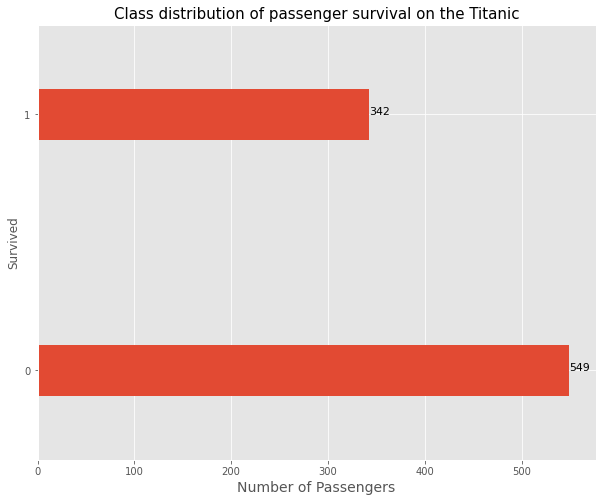

In [17]:
plt.style.use('ggplot')
subplot= class_dist.groupby('Survived')['Num_Passengers'].sum().plot(kind='barh', width=0.2, figsize=(10,8))
subplot.set_title('Class distribution of passenger survival on the Titanic', fontsize = 15)
subplot.set_xlabel('Number of Passengers', fontsize = 14)
for i in subplot.patches:
     subplot.text(i.get_width() + 0.1, i.get_y() + 0.1, str(i.get_width()), fontsize=11)

In [18]:
data.describe().T #missing values are/or can be a problem

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [21]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data['Sex']=data['Sex'].map({'male':0,'female':1})
#Here I mapped the sex of passengers to binary values "0" and "1"

# Split the dataset

In [23]:
# we split the data in an 80:20 ratio meaning that 80% is for training and 20% for testing
from sklearn.model_selection import train_test_split


In [24]:
y= data.Survived
X= data.drop(['Name', 'Ticket', 'Cabin','Embarked', 'Age'], axis=1)


In [25]:
X

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,0,1,0,7.2500
1,2,1,1,1,1,0,71.2833
2,3,1,3,1,0,0,7.9250
3,4,1,1,1,1,0,53.1000
4,5,0,3,0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000
887,888,1,1,1,0,0,30.0000
888,889,0,3,1,1,2,23.4500
889,890,1,1,0,0,0,30.0000


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=np.random.seed(7))

In [28]:
X_train.shape

(712, 7)

In [29]:
X_test.shape

(179, 7)

In [30]:
y.shape

(891,)

# Create a Logistic Regression Model

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.linear_model import LogisticRegression
import wandb 
import time 

# We create a utility function that we can reuse

In [32]:
def train_eval_pipeline(model, train_data, test_data, name):
    #initialize wandb
    wandb.init(project = 'Machine Learning for titanic data set', name=name)
    #assign the data
    (X_train, y_train)=train_data
    (X_test, y_test)=test_data

    #Train the model
    start=time.time()
    model.fit(X_train, y_train)
    end=time.time()-start
    prediction=model.predict(X_test)

    wandb.log({"accuracy":accuracy_score(y_test, prediction)*100, "precision":precision_recall_fscore_support(y_test, prediction, average='macro')[0], "recall":precision_recall_fscore_support(y_test, prediction, average='macro')[1], "training time": end})
    print("Accuracy Score of the Logistic Regression Classifier with default hyperparameter values {0:.2f}%".format(accuracy_score(y_test, prediction)*100.))
    print("\n")
    print("---Classification report of the Logistic Regression Classifier with default parameter values---")
    print("\n")
    print(classification_report(y_test, prediction, target_names=["Survived", "Did not survive"]))

In [33]:
logreg = LogisticRegression()

In [34]:
X_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
205,206,0,3,1,0,1,10.4625
718,719,0,3,0,0,0,15.5000
835,836,1,1,1,1,1,83.1583
851,852,0,3,0,0,0,7.7750
773,774,0,3,0,0,0,7.2250
...,...,...,...,...,...,...,...
579,580,1,3,0,0,0,7.9250
502,503,0,3,1,0,0,7.6292
537,538,1,1,1,0,0,106.4250
196,197,0,3,0,0,0,7.7500


In [35]:
y_train

205    0
718    0
835    1
851    0
773    0
      ..
579    1
502    0
537    1
196    0
175    0
Name: Survived, Length: 712, dtype: int64

In [38]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic_Regression_titanic_dataset")

accuracy,100.0
precision,1.0
recall,1.0
training time,0.019
_runtime,2
_timestamp,1632597461
_step,0


accuracy,▁
precision,▁
recall,▁
training time,▁
_runtime,▁
_timestamp,▁
_step,▁


wandb: wandb version 0.12.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Accuracy Score of the Logistic Regression Classifier with default hyperparameter values 100.00%


---Classification report of the Logistic Regression Classifier with default parameter values---


                 precision    recall  f1-score   support

       Survived       1.00      1.00      1.00       110
Did not survive       1.00      1.00      1.00        69

       accuracy                           1.00       179
      macro avg       1.00      1.00      1.00       179
   weighted avg       1.00      1.00      1.00       179

